In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

%matplotlib inline
# %matplotlib qt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [2]:
# load the wildfire climate data
fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_climate_and_fire_full.csv')
fire_climate_df.shape

(164, 70)

In [3]:
fire_climate_df.head(2)

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,County,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,median_income,median_income_level,seaside_inland,stations,station_latitude,station_longitude,started_date_str
0,"PALM SPRINGS ASOS, CA US",33.82220,-116.50430,124.7,2017-06-26,9.17,0.0,116.0,85.0,320.0,330.0,31.1,38.9,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Riverside,6309.0,False,CAL FIRE/Riverside County Fire,NaN,2017,True,/incidents/2017/6/26/manzanita-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2018-01-09T11:08:00Z,NaN,False,True,NaN,NaN,NaN,33.530045,"Hwy 79 North, Lambs Canyon south of Dump Road,...",-116.594422,False,Manzanita Fire,100.0,NaN,True,"The Manzanita Fire started on June 26, 2017 of...","Hwy 79 North, Lambs Canyon, Riverside County, ...",2017-06-26T15:10:00Z,Finalized,NaN,NaN,NaN,NaN,ca0c9a5f-7a1a-4903-b790-6eb3e85e7e64,2018-01-09T11:08:00Z,NaN,63948.0,3,inland,"PALM SPRINGS ASOS, CA US",33.82220,-116.50430,2017-06-26
1,"CARLSBAD MCCLELLAN PALOMAR AIRPORT, CA US",33.12806,-117.27944,100.0,2017-12-07,6.26,0.0,82.0,50.0,90.0,90.0,23.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,4100.0,False,CAL FIRE San Diego Unit,NaN,2017,True,/incidents/2017/12/7/lilac-fire/,"<p>12/13/17 PM - See the latest <a href=""http:...",All roads reopened.,San Diego,37,NaN,NaN,NaN,2018-01-09T13:47:00Z,NaN,False,True,NaN,NaN,NaN,33.323700,"Old Hwy 395 at Dulin Road, Bonsall",-117.163000,True,Lilac Fire,100.0,NaN,True,"The Lilac Fire started on December 7, 2017 at ...","Lilac Fire, San Diego County, December 7, 2017...",2017-12-07T11:15:00Z,Finalized,64.0,157.0,NaN,NaN,fc4fcd00-8eee-43e5-b77f-bbd0c1669744,2018-01-09T13:47:00Z,NaN,74855.0,4,seaside,"CARLSBAD MCCLELLAN PALOMAR AIRPORT, CA US",33.12806,-117.27944,2017-12-07


variable         | description
---------------- | -----------
`ELEVATION`      | elevation of climate station
`fire_flag`      | 1 is fire, 0 is no-fire
`Date`      | climate date that the fire start
`AWND`      | Average daily wind speed (meters per second or miles per hour as per user preference)
`PRCP`      | Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
`TMAX`      | Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
`TMIN`      | Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
`WDF2`      | Direction of fastest 2-minute wind (degrees)
`WDF5`      | Direction of fastest 5-second wind (degrees)
`WSF2`      | Fastest 2-minute wind speed (miles per hour or meters per second as per user preference)
`WSF5`      | Fastest 5-second wind speed (miles per hour or meters per second as per user preference)
`WTxx`      | Weather Type where ** as followed
`County`      | The County where the fire started
`AcresBurned`      | The acres that the fire burned

```
WTxx
01 = Fog, ice fog, or freezing fog (may include heavy fog)
02 = Heavy fog or heaving freezing fog (not always
distinguished from fog)
03 = Thunder
04 = Ice pellets, sleet, snow pellets, or small hail
05 = Hail (may include small hail)
06 = Glaze or rime
07 = Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction
08 = Smoke or haze
09 = Blowing or drifting snow
10 = Tornado, waterspout, or funnel cloud
11 = High or damaging winds
12 = Blowing spray
13 = Mist
14 = Drizzle
15 = Freezing drizzle
16 = Rain (may include freezing rain, drizzle, and freezing drizzle)
17 = Freezing rain
18 = Snow, snow pellets, snow grains, or ice crystals
19 = Unknown source of precipitation
21 = Ground fog
22 = Ice fog or freezing fog
```

# The Research Content

####  1) Using Simple Linear Regression to find out the relationship between AcresBurned and TMAX.

####  2) Using Multiple Linear Regression to find out the relationship between AcresBurned and Other variables.

####  3) Using Logistic Linear Regression to predict the fires whether happened or not.

####  4) Using Logistic Linear Regression to predict the fires by categorical variables.

# 1) Using Simple Linear Regression to find out the relationship between AcresBurned and TMAX.

- select AWND and AcresBurned to run the Simple linear regression

In [4]:
fire_climate_df.corr()[['AcresBurned']].sort_values('AcresBurned')

,AcresBurned
WaterTenders,-0.424333
Latitude,-0.219465
CalFireIncident,-0.146701
WDF5,-0.124845
ELEVATION,-0.119448
Helicopters,-0.083371
WDF2,-0.063757
ArchiveYear,-0.062313
Dozers,-0.056542
median_income,-0.037098


In selecting features to include in this linear regression model, I would like to error on the side of being slightly less permissive in including variables with moderate or lower correlation coefficients. So I will select TMAX and AcresBurned.

In [5]:
awnd_acres_sub_df = fire_climate_df[['TMAX', 'AcresBurned']]
awnd_acres_sub_df.head(2)

,TMAX,AcresBurned
0,116.0,6309.0
1,82.0,4100.0


# 1.1) Exploring the data

In [6]:
awnd_acres_sub_df.dropna(inplace = True)

In [7]:
awnd_acres_sub_df.describe()

,TMAX,AcresBurned
count,162.000000,162.000000
mean,90.543210,326.438272
std,13.200366,1238.451437
min,61.000000,0.000000
25%,79.250000,20.000000
50%,92.500000,42.500000
75%,98.000000,153.750000
max,119.000000,13139.000000


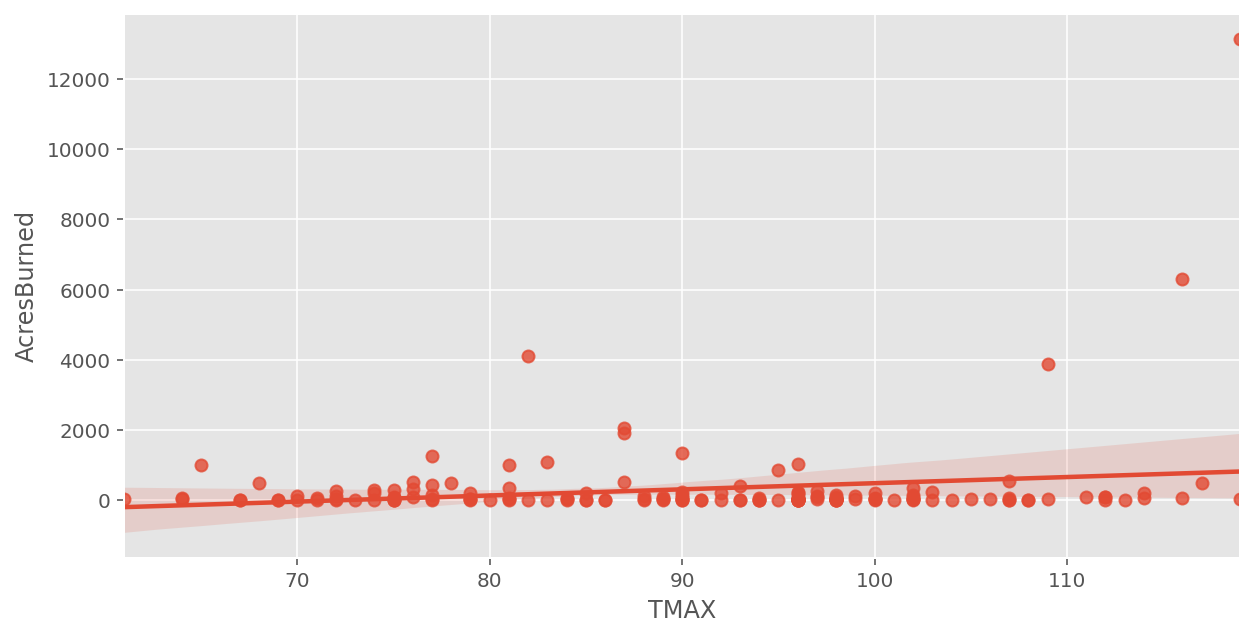

In [8]:
sns.regplot(x="TMAX", y="AcresBurned", data=awnd_acres_sub_df);
plt.xlabel('TMAX')
plt.ylabel('AcresBurned')
plt.show();

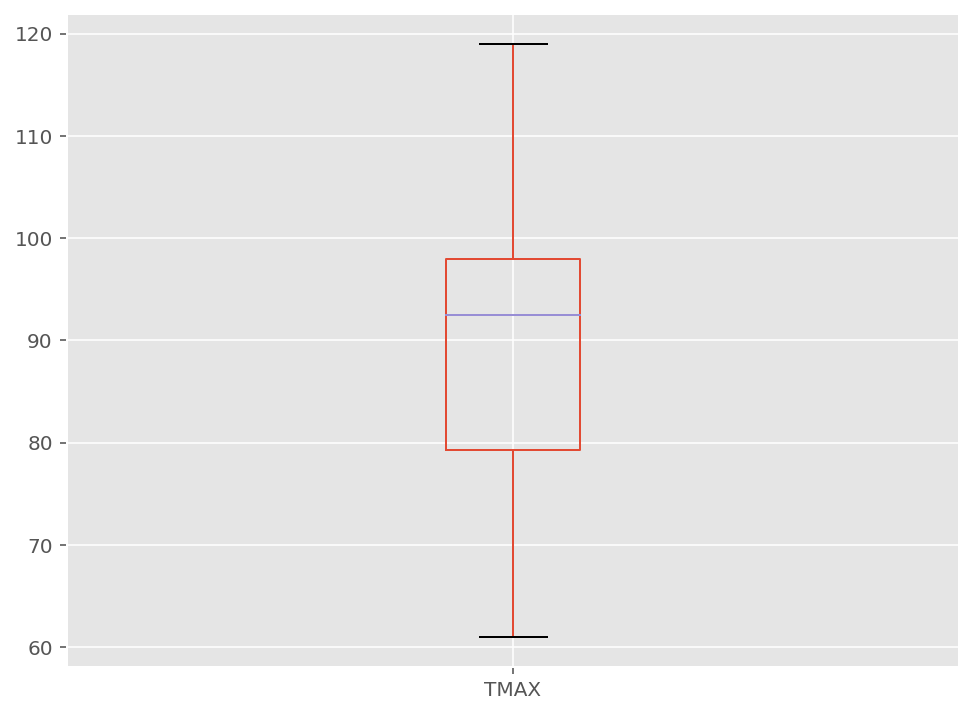

In [9]:
# Using box plot to show the AcresBurned
fig = plt.figure(figsize=(8, 6))

boxplot = awnd_acres_sub_df[['TMAX']].boxplot()
plt.title("")
plt.show()

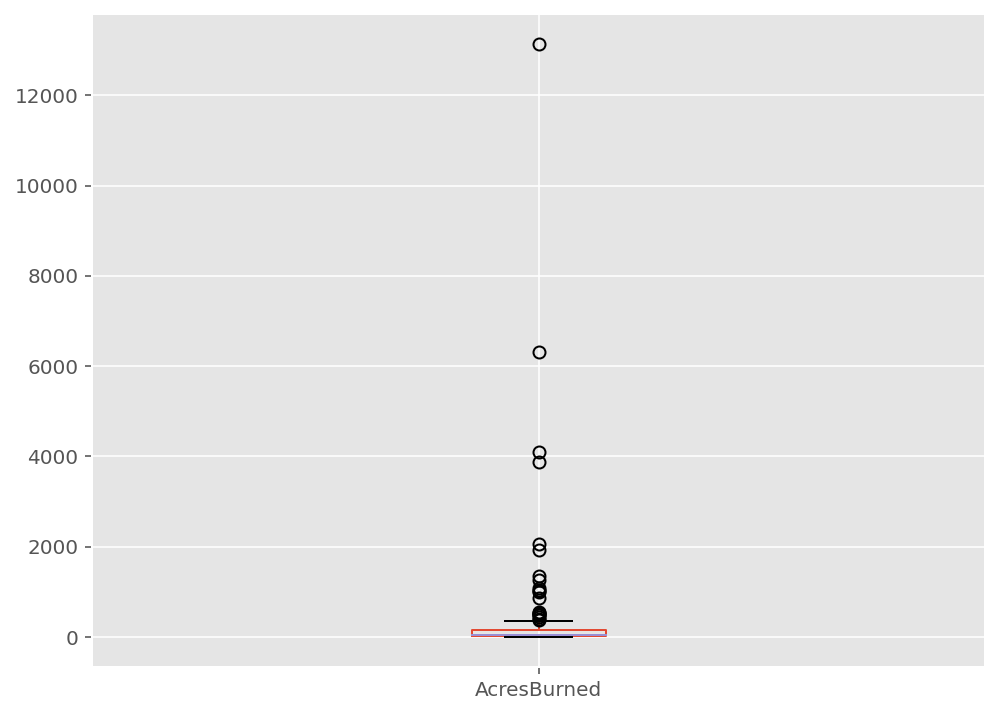

In [10]:
# Using box plot to show the AcresBurned
fig = plt.figure(figsize=(8, 6))

boxplot = awnd_acres_sub_df[['AcresBurned']].boxplot()
plt.title("")
plt.show()

From the above description, scatter chart and box chart, we can see there are many outliers. These outliers may affect the accuracy of the results.

# 1.2) Do the Linear Regression

In [11]:
# Data preparing and cleaning
awnd_acres_sub_df['TMAX'].isnull().sum()

0

In [12]:
awnd_acres_sub_df['AcresBurned'].isnull().sum()

0

In [13]:
# drop NaN rows
awnd_acres_sub_df.dropna(inplace=True)

In [14]:
# Do the linear regression
# get x and y
x_arr = awnd_acres_sub_df['TMAX'].to_numpy().reshape(-1, 1)
y_arr = awnd_acres_sub_df['AcresBurned'].to_numpy().reshape(-1, 1)

# do the linear regression
lr_model = LinearRegression()
lr_model.fit(x_arr, y_arr)

coef = lr_model.coef_
intercept = lr_model.intercept_

print('Slope:', coef[0][0])
print('Intercept:', intercept[0])

Slope: 17.477685168479002
Intercept: -1256.0474447608026


# 1.3) To judge the model of linear regression.

Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:
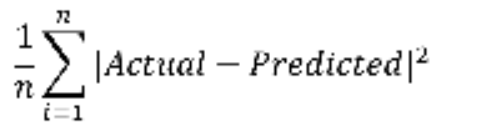

In [15]:
y_predict = lr_model.predict(x_arr)
MSE = mean_squared_error(y_arr, y_predict) # mean stand error of (y and y_predict) 
R2 = r2_score(y_arr, y_predict)

print('MSE:', MSE)

print('R-squared:', R2)

MSE: 1471394.9060706845
R-squared: 0.03470418386744312


In [16]:
# to see more detail
m = ols('AcresBurned ~ TMAX', awnd_acres_sub_df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AcresBurned   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sat, 08 May 2021   Prob (F-statistic):             0.0176
Time:                        10:10:37   Log-Likelihood:                -1380.2
No. Observations:                 162   AIC:                             2764.
Df Residuals:                     160   BIC:                             2771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1256.0474    666.743     -1.884      0.061   -2572.799      60.704
TMAX          17.4777      7.287      2.398      0.018       3.086      31.869
==============================================================================
Omnibus:                      264.283   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31175.794
Skew:                           7.401   Prob(JB):                         0.00
Kurtosis:                      69.329   Cond. No.                         636.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.4) Conclusion: Simple linear regression

- x is TMAX
- y is AcresBurned

- formula is y = intercept + coef * x

In [17]:
print(" y = %0.8f + %0.8f * x " %(intercept, coef))

 y = -1256.04744476 + 17.47768517 * x 


In [18]:
print("R2 is %0.8f . R2 is a lot less than 1 " %R2)

R2 is 0.03470418 . R2 is a lot less than 1 


The simple linear regression is not good, so we will use Mulitple linear regression to dip deeper data set.

# 2) Using Mulitple Linear Regression to find out the relationship between AcresBurned and Other variables.

In [19]:
sub_mulit_df = fire_climate_df[['ELEVATION','AWND','PRCP','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5','AcresBurned']]
sub_mulit_df.head(2)

,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,AcresBurned
0,124.7,9.17,0.0,116.0,85.0,320.0,330.0,31.1,38.9,6309.0
1,100.0,6.26,0.0,82.0,50.0,90.0,90.0,23.0,28.0,4100.0


 # 2.1) Exploring the data
 We can actually take a look at the relationships between all variables

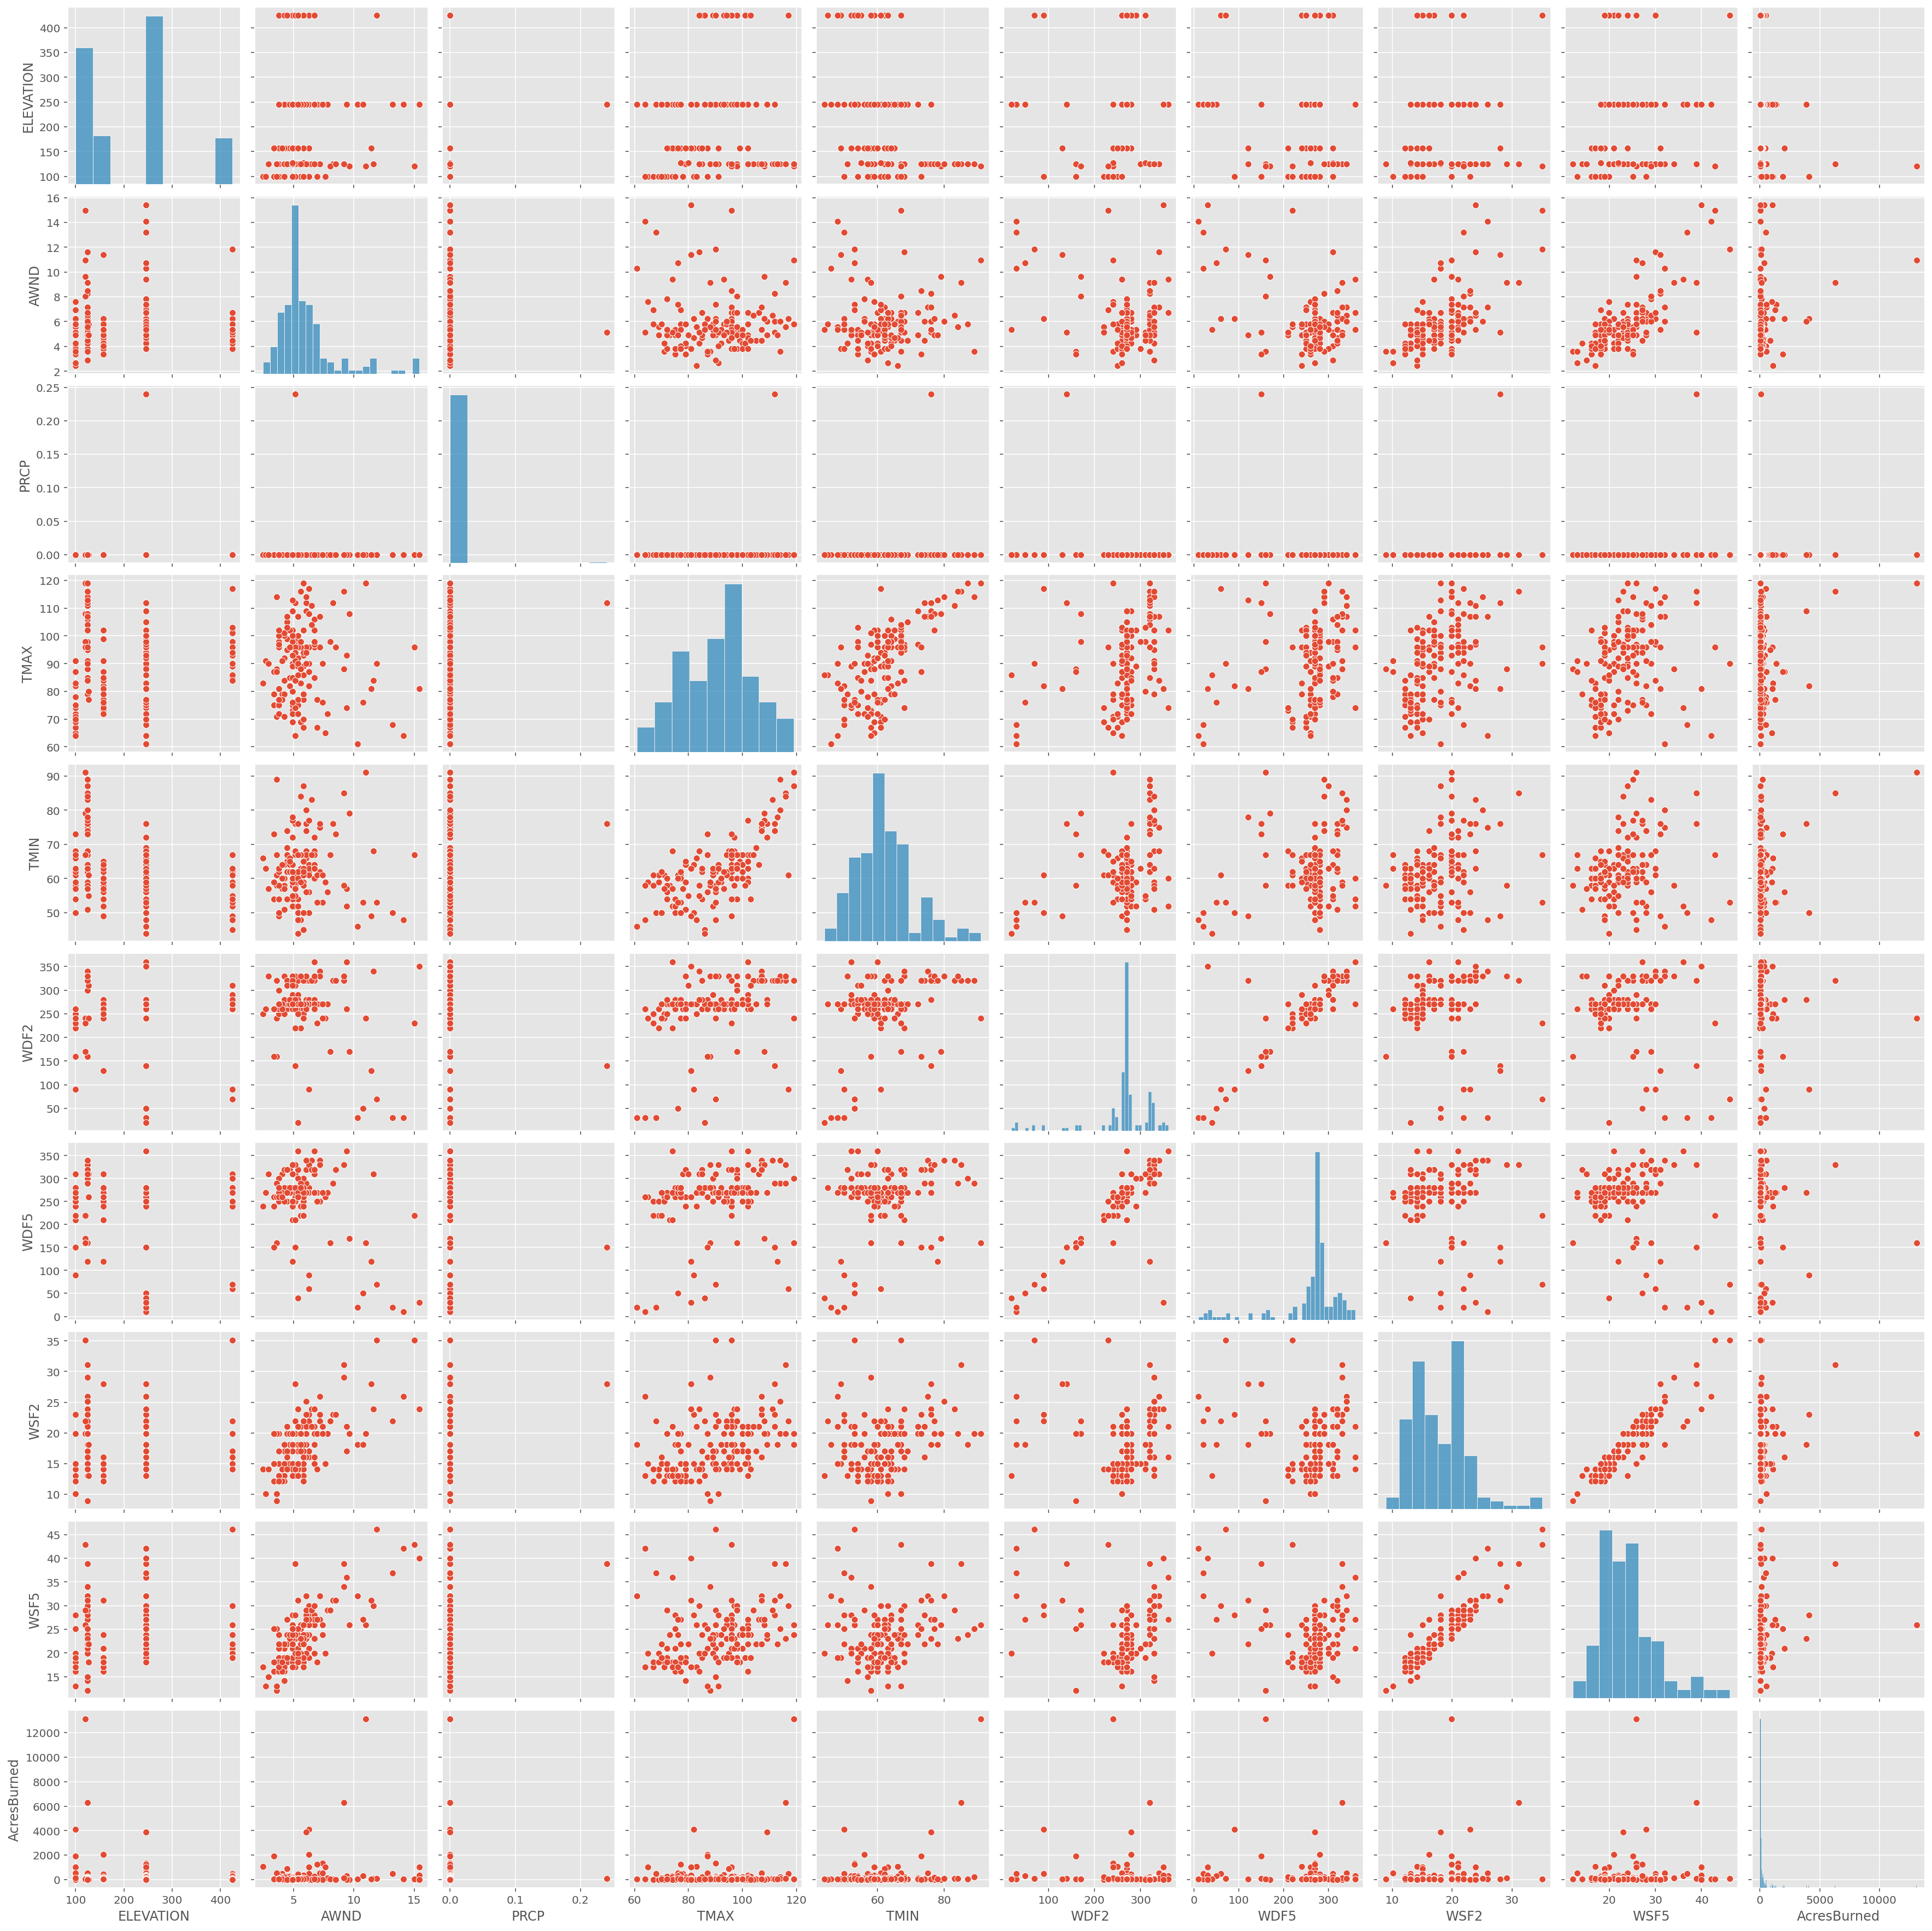

In [20]:
sns.pairplot(sub_mulit_df)
plt.show();

From the above charts, we can see that the correlation between AcresBurned and other variables are not strong, because there are many outliers that can affect the correlation values.

# 2.2) Do the Multiple Linear Regression

- To find out the best model

In [21]:
# start Mulitple linear regression
m_full = sm.formula.ols(formula = 'AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5', data = sub_mulit_df)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            AcresBurned   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 08 May 2021   Prob (F-statistic):           0.000478
Time:                        10:10:50   Log-Likelihood:                -1319.0
No. Observations:                 156   AIC:                             2658.
Df Residuals:                     146   BIC:                             2688.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2137.5211    971.810     -2.200      0.0

In [22]:
full_predictors_r2 = multi_reg.rsquared # multi_reg.params
print('R2: ', full_predictors_r2)
print('The R2 is less than 1, so the model (AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5) is not good enough. We plan to use Backward and Forward Elimination to select the best model.')

R2:  0.1806896191056223
The R2 is less than 1, so the model (AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5) is not good enough. We plan to use Backward and Forward Elimination to select the best model.


# 2.3) Using Backward elimination to select the best model to predict the AcresBurned.

In [23]:
# select variables
predictor_names = ['ELEVATION','AWND','PRCP','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5']

In [24]:
def name_list_to_map(name_list):
    result = {}
    for s in name_list:
        names = name_list.copy()
        names.remove(s)
        result[s] = names
    return result

def contact_linear_regression_parameter(predictor_name_list):
    # 'AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5'
    key = ''
    if len(predictor_name_list) > 0:
        param = 'AcresBurned ~ '

        names = ' + '.join(predictor_name_list)

        key = param + names
    
    return key

# contact_linear_regression_parameter(predictor_names)

def select_best_predictors(input_predicts):
    
    result = 0.0
    if input_predicts:
        ml_result = sm.formula.ols(formula = input_predicts, data = sub_mulit_df)
        ml_reg = ml_result.fit()
        result = ml_reg.rsquared
    return result   

def get_predictors_with_r2_highest(input_name_dict):
    highest = 0.0
    removed_key = ''
    for key, value in input_name_dict.items():
        input_predicts = contact_linear_regression_parameter(value)
        r2 = select_best_predictors(input_predicts)
        if r2 > highest:
            highest = r2
            removed_key = key
    
    result = []
    if removed_key != '':
        print("remove %s, keep %s, we get the highest r2 = %.8f" %(removed_key,input_name_dict[removed_key], highest))
        
        result = input_name_dict[removed_key]
    return result

# get_predictors_with_r2_highest(name_dict)

def recursive_get_highest_predictors(name_dict):
    """
        Using backward elimiation to select the best model.
        Backward elimiation will remove one variable with the highest P>|t| per times.
    """
    if not name_dict:
        return
    else:
        remained_names = get_predictors_with_r2_highest(name_dict)
        # print(remained_names)
        remained_dic = name_list_to_map(remained_names)
        # print(remained_dic)
        recursive_get_highest_predictors(remained_dic)
        return

In [25]:
name_dict = name_list_to_map(predictor_names)

recursive_get_highest_predictors(name_dict)

remove WSF2, keep ['ELEVATION', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF5'], we get the highest r2 = 0.18067891
remove WDF2, keep ['ELEVATION', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF5', 'WSF5'], we get the highest r2 = 0.18052868
remove PRCP, keep ['ELEVATION', 'AWND', 'TMAX', 'TMIN', 'WDF5', 'WSF5'], we get the highest r2 = 0.17970548
remove ELEVATION, keep ['AWND', 'TMAX', 'TMIN', 'WDF5', 'WSF5'], we get the highest r2 = 0.17708006
remove TMAX, keep ['AWND', 'TMIN', 'WDF5', 'WSF5'], we get the highest r2 = 0.17393319
remove WDF5, keep ['AWND', 'TMIN', 'WSF5'], we get the highest r2 = 0.15745645
remove WSF5, keep ['AWND', 'TMIN'], we get the highest r2 = 0.13552140
remove AWND, keep ['TMIN'], we get the highest r2 = 0.08795532


In [26]:
print('R2 of (AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5) is %.4f. It is higher than all other models. So the Backward Elimination is not fit for this data set.' %(full_predictors_r2))

R2 of (AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5) is 0.1807. It is higher than all other models. So the Backward Elimination is not fit for this data set.


Because Backward elimination shows that R2 can not increase, the climate data can not predict the burned acres by wildfires accurately. Next, We will use the Forward elimination to get the best model.

# 2.4) Using forward elimination to get the best model

In [27]:

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            # print(formula)
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [28]:
model = forward_selected(sub_mulit_df, 'AcresBurned')

print(model.summary())
print(model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:            AcresBurned   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     8.001
Date:                Sat, 08 May 2021   Prob (F-statistic):           7.01e-06
Time:                        10:10:51   Log-Likelihood:                -1327.6
No. Observations:                 157   AIC:                             2665.
Df Residuals:                     152   BIC:                             2680.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2207.2995    802.085     -2.752      0.0

# 2.5) Conclusion: Multiple linear regression

- The R2 of all models are lower than 0.181 that is fitted by AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5

- Using Multiple Linear regression to predict AcresBurned by continuous variables is not a good way

# 3) Using Logistic Linear Regression to predict the fires whether happened or not.

In [29]:
# load the wildfire climate data
fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_Fire_nearest_climate.csv')
fire_climate_df.shape

(164, 24)

In [30]:
# load the no wildfire climate data
no_fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_No_Fire_nearest_climate.csv')
no_fire_climate_df.shape

(9697, 24)

Select no-fire sample randomly. The number of no-fire samples is 3 times that of the fire samples.

In [31]:
# select no fire climate data randomly
random_no_fire_climate_df = no_fire_climate_df.sample(n=492)
random_no_fire_climate_df.head(2)

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,County,fire_flag
3134,"SAN DIEGO BROWN FIELD, CA US",32.57222,-116.97944,157.0,2019-09-10,7.16,0.00,78.0,62.0,270.0,230.0,16.1,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,0
5473,"RAMONA AIRPORT, CA US",33.03750,-116.91583,424.6,2017-02-17,9.62,0.88,61.0,48.0,170.0,150.0,28.0,36.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,0


# 3.1) Exploring the data

In [32]:
fire_climate_df.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,fire_flag
count,164.000000,164.000000,164.000000,164.000000,163.000000,164.000000,161.000000,164.000000,162.000000,164.000000,162.000000,41.0,7.0,1.0,0.0,3.0,24.0,19.0,0.0,0.0,164.0
mean,33.527316,-117.066355,210.843293,5.998293,0.001472,90.542683,62.155280,262.926829,254.320988,18.041463,23.856173,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
std,0.508569,0.510017,96.805771,2.464238,0.018798,13.119250,8.743254,62.924393,71.790556,4.680109,6.362379,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
min,32.572220,-117.438610,100.000000,2.460000,0.000000,61.000000,44.000000,20.000000,10.000000,8.900000,12.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
25%,33.105420,-117.438610,124.700000,4.700000,0.000000,79.750000,57.000000,260.000000,252.500000,14.775000,19.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
50%,33.822200,-117.279440,245.200000,5.370000,0.000000,92.000000,62.000000,270.000000,270.000000,17.000000,23.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
75%,33.951940,-116.915830,245.200000,6.317500,0.000000,98.000000,67.000000,280.000000,280.000000,21.000000,27.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
max,33.951940,-114.714200,424.600000,15.430000,0.240000,119.000000,91.000000,360.000000,360.000000,35.100000,46.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0


In [33]:
random_no_fire_climate_df.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,fire_flag
count,492.000000,492.000000,492.000000,491.000000,484.000000,491.000000,491.000000,491.000000,488.000000,491.000000,488.000000,141.0,24.0,8.0,0.0,0.0,15.0,87.0,0.0,0.0,492.0
mean,33.129184,-116.872524,139.794715,5.735927,0.040517,76.586558,56.260692,251.690428,248.934426,15.673116,20.362090,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0
std,0.489458,0.700744,120.336402,2.557967,0.271764,13.021887,11.207198,73.524908,75.508487,4.946391,6.463438,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
min,32.572220,-117.438610,4.600000,1.340000,0.000000,49.000000,26.000000,10.000000,10.000000,6.900000,8.900000,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0
25%,32.733600,-117.200000,7.900000,4.030000,0.000000,68.000000,49.000000,230.000000,230.000000,13.000000,16.100000,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0
50%,33.037500,-117.139440,124.700000,5.370000,0.000000,75.000000,56.000000,270.000000,270.000000,14.100000,19.000000,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0
75%,33.618600,-116.915830,157.000000,6.600000,0.000000,82.000000,63.000000,300.000000,300.000000,17.550000,23.000000,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0
max,33.951940,-114.714200,424.600000,20.580000,5.050000,118.000000,90.000000,360.000000,360.000000,45.000000,57.900000,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0


In [34]:
# merge the two dataset together
merged_two_pd = pd.concat([fire_climate_df, random_no_fire_climate_df])
merged_two_pd.shape

(656, 24)

In [35]:
merged_two_pd.isnull().sum()

NAME           0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
AWND           1
PRCP           9
TMAX           1
TMIN           4
WDF2           1
WDF5           6
WSF2           1
WSF5           6
WT01         474
WT02         625
WT03         647
WT04         656
WT05         653
WT07         617
WT08         550
WT10         656
WT11         656
County         0
fire_flag      0
dtype: int64

WT01 - WT11 can be dummy variables. We will use 0 to fill NaN.

In [36]:
# awnd_acres_sub_df.dropna(inplace=True)
merged_two_pd['WT01'].fillna(0, inplace=True)
merged_two_pd['WT02'].fillna(0, inplace=True)
merged_two_pd['WT03'].fillna(0, inplace=True)
merged_two_pd['WT04'].fillna(0, inplace=True)
merged_two_pd['WT05'].fillna(0, inplace=True)
merged_two_pd['WT07'].fillna(0, inplace=True)
merged_two_pd['WT08'].fillna(0, inplace=True)
merged_two_pd['WT10'].fillna(0, inplace=True)
merged_two_pd['WT11'].fillna(0, inplace=True)

# convert float to int
merged_two_pd['WT01'] = merged_two_pd['WT01'].astype(int)
merged_two_pd['WT02'] = merged_two_pd['WT02'].astype(int)
merged_two_pd['WT03'] = merged_two_pd['WT03'].astype(int)
merged_two_pd['WT04'] = merged_two_pd['WT04'].astype(int)
merged_two_pd['WT05'] = merged_two_pd['WT05'].astype(int)
merged_two_pd['WT07'] = merged_two_pd['WT07'].astype(int)
merged_two_pd['WT08'] = merged_two_pd['WT08'].astype(int)
merged_two_pd['WT10'] = merged_two_pd['WT10'].astype(int)
merged_two_pd['WT11'] = merged_two_pd['WT11'].astype(int)

In [37]:
# drop nan for other columns
merged_two_pd.dropna(inplace=True)

In [38]:
merged_two_pd.isnull().sum()

NAME         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
DATE         0
AWND         0
PRCP         0
TMAX         0
TMIN         0
WDF2         0
WDF5         0
WSF2         0
WSF5         0
WT01         0
WT02         0
WT03         0
WT04         0
WT05         0
WT07         0
WT08         0
WT10         0
WT11         0
County       0
fire_flag    0
dtype: int64

In [39]:
merged_two_pd.shape

(638, 24)

In [40]:
merged_two_pd.head(2)

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,County,fire_flag
0,"PALM SPRINGS ASOS, CA US",33.82220,-116.50430,124.7,2017-06-26,9.17,0.0,116.0,85.0,320.0,330.0,31.1,38.9,0,0,0,0,0,1,0,0,0,Riverside,1
1,"CARLSBAD MCCLELLAN PALOMAR AIRPORT, CA US",33.12806,-117.27944,100.0,2017-12-07,6.26,0.0,82.0,50.0,90.0,90.0,23.0,28.0,0,0,0,0,0,0,0,0,0,San Diego,1


fire_flag
0    480
1    158
dtype: int64


<AxesSubplot:xlabel='fire_flag'>

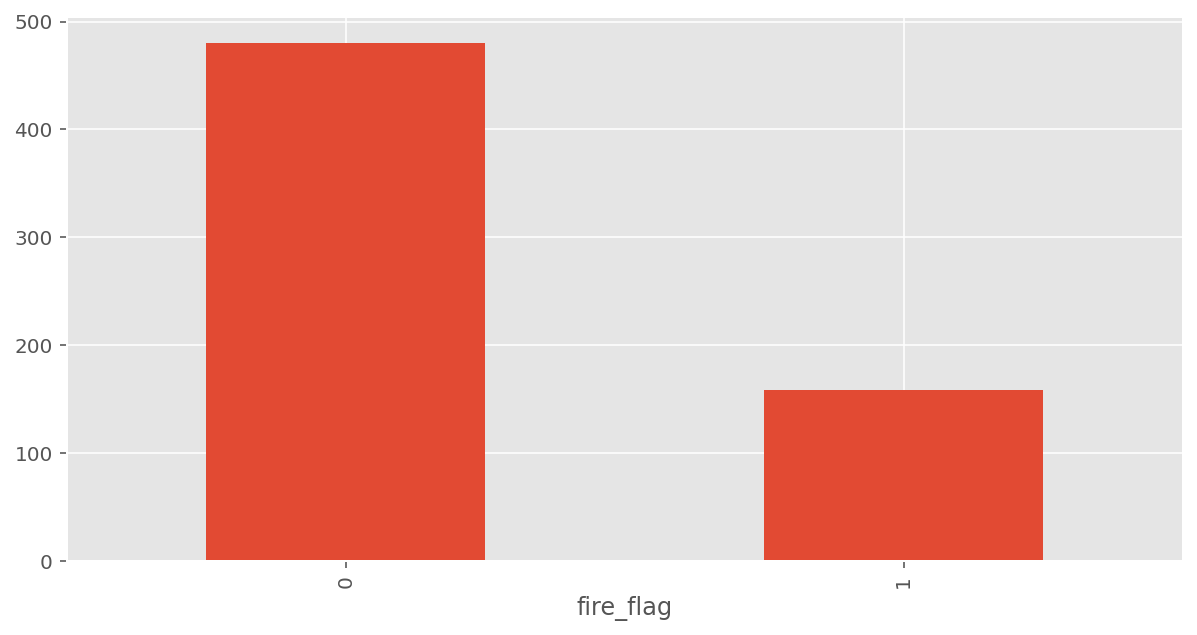

In [41]:
fire_flag_bar_df = merged_two_pd[['fire_flag']].groupby('fire_flag').size()
print(fire_flag_bar_df)
fire_flag_bar_df.plot.bar()

# 3.2) Logistic Regression to predict the fires

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
merged_two_pd.columns

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND', 'PRCP',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT07', 'WT08', 'WT10', 'WT11', 'County', 'fire_flag'],
      dtype='object')

In [44]:
# select X and Y

x = merged_two_pd[[ 'ELEVATION', 'AWND', 'PRCP', 
                   'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']]

y = merged_two_pd['fire_flag']

# Build the training and test
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=17)

# building the model and fitting the data
log_reg = sm.Logit(y_train, x_train).fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.521614
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              fire_flag   No. Observations:                  510
Model:                          Logit   Df Residuals:                      501
Method:                           MLE   Df Model:                            8
Date:                Sat, 08 May 2021   Pseudo R-squ.:                 0.07063
Time:                        10:10:51   Log-Likelihood:                -266.02
converged:                       True   LL-Null:                       -286.24
Covariance Type:            nonrobust   LLR p-value:                 2.659e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ELEVATION      0.0007      0.001      0.650      0.516      -0.001       0.003
AWND          -0.3292      0.081     -4.073      0.000      -0.488      -0.171
PRCP         -10.9091      6.358     -1.716      0.086     -23.371       1.553
TMAX           0.0263      0.014      1.932      0.053      -0.000       0.053
TMIN          -0.0249      0.017     -1.495      0.135      -0.058       0.008
WDF2          -0.0040      0.002     -1.851      0.064      -0.008       0.000
WDF5          -0.0032      0.002     -1.537      0.124      -0.007       0.001
WSF2          -0.0143      0.072     -0.198      0.843      -0.155       0.127
WSF5           0.1011      0.057      1.770      0.077      -0.011       0.213
==============================================================================
"""

In [45]:
# table = sm.stats.anova_lm(log_reg, test = 'Chisq') # Chisq ANOVA

# 3.3) Evaluate the model

- split two models. 
    - model 1: p of variables > 0.1
    - model 2: p of variables <= 0.1

In [46]:
# model 1: p of variables > 0.1
def model_1():
    x = merged_two_pd[['ELEVATION', 'WDF5', 'WSF2']]

    y = merged_two_pd['fire_flag']

    # Build the training and test
    x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=17)

    # building the model and fitting the data
    log_reg = sm.Logit(y_train, x_train).fit()

    print(log_reg.summary())
model_1()

Optimization terminated successfully.
         Current function value: 0.567208
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fire_flag   No. Observations:                  510
Model:                          Logit   Df Residuals:                      507
Method:                           MLE   Df Model:                            2
Date:                Sat, 08 May 2021   Pseudo R-squ.:                -0.01060
Time:                        10:10:51   Log-Likelihood:                -289.28
converged:                       True   LL-Null:                       -286.24
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ELEVATION      0.0026      0.001      3.225      0.001       0.001       0.004
WDF5          -0.0042      0.

In [47]:
# model 2: p of variables <= 0.1
def model_2():
    models = ['AWND', 'TMIN', 'TMAX', 'WDF2', 'WSF5']
    x = merged_two_pd[['AWND', 'TMAX', 'WDF2', 'WSF5']]

    y = merged_two_pd['fire_flag']

    # Build the training and test
    x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=17)

    # building the model and fitting the data
    log_reg = sm.Logit(y_train, x_train).fit()

    print(log_reg.summary())
    return models
model_2()

Optimization terminated successfully.
         Current function value: 0.544102
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              fire_flag   No. Observations:                  510
Model:                          Logit   Df Residuals:                      506
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 May 2021   Pseudo R-squ.:                 0.03056
Time:                        10:10:51   Log-Likelihood:                -277.49
converged:                       True   LL-Null:                       -286.24
Covariance Type:            nonrobust   LLR p-value:                 0.0005585
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AWND          -0.3581      0.076     -4.699      0.000      -0.507      -0.209
TMAX           0.0145      0.

['AWND', 'TMIN', 'TMAX', 'WDF2', 'WSF5']

# 3.4) Conclusion -- Logistic Regression using value directly

- model 2: (p of variables <= 0.1) is better than model 1: (p of variables > 0.1)

- The Pseudo R-squ. of model 1 and model 2 are very low, so they are not good.

# 4) Using Logistic Linear Regression to predict the fires by categorical variables

- Transfer Continuous variable to Categorical variable

- Using Q1, Q2, Q2 and Q4 to convert Continuous variable
    - For example: WDF2
        - Using Q1, Q2, Q2 and Q4 of WDF2 to splite the WDF2 as 4 levels
- Convert Date to Spring, Summer, Fall and Winter
    - Srping : Mar, Apr, May
    - Summer : Jun, Jul, Aug
    - Fall : Sep, Oct, Nov
    - Winter : Dec, Jan, Feb
- Convert WDF2 and WDF5 to NW, NE, SE, SW
    - NE : 0 - 90
    - SE : 90 - 180
    - SW : 180 - 270
    - WN : 270 - 360

<AxesSubplot:>

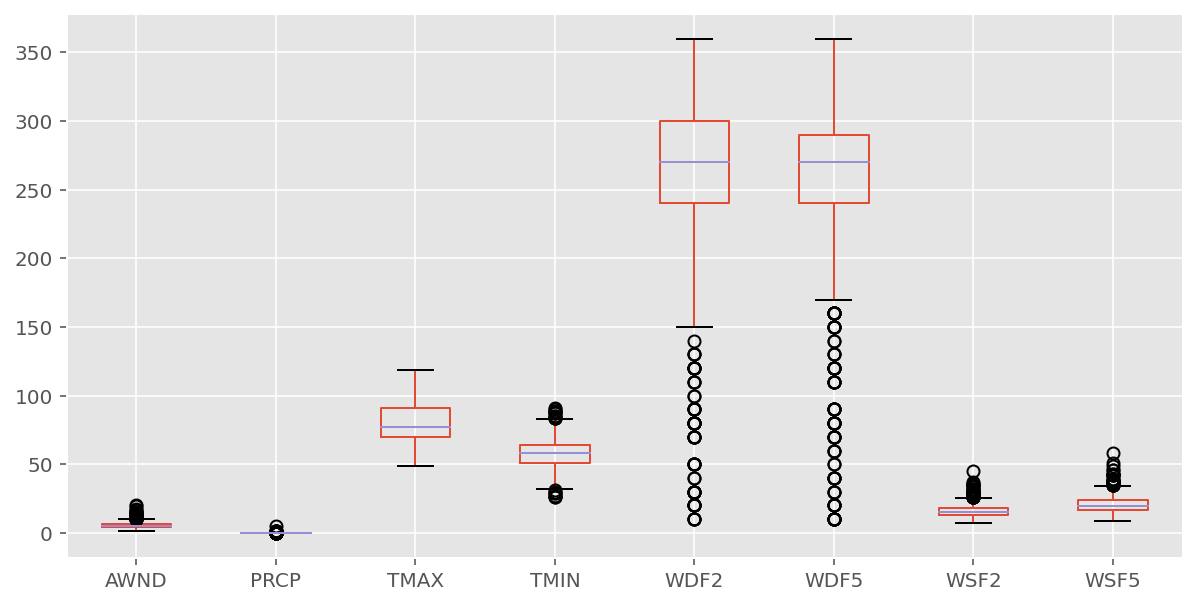

In [48]:
merged_two_pd[['AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']].boxplot()

# 4.1) Convert to categorical variables

In [49]:
def get_4qs(df, col):
    result = {}
    result['q1'] = df[col].quantile(.25)
    result['q2'] = df[col].quantile(.50)
    result['q3'] = df[col].quantile(.75)
    return result

def get_level(q4_dict, a):
    level = 'q1'
    if a <= q4_dict.get('q1'):
        level = 'q1'
    elif a > q4_dict.get('q1') and a <= q4_dict.get('q2'):
        level = 'q2'
    elif a > q4_dict.get('q2') and a <= q4_dict.get('q3'):
        level = 'q3'
    else:
        level = 'q4'
        
    return level

def split_by_q1_to_q4(df, cols = ['AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']):
    
    for col in cols:
        #if col != 'fire_flag' and col != 'DATE':
        if col not in ['fire_flag', 'DATE', 'WDF2', 'WDF5']:
            q4_dict = get_4qs(df, col)

            df[col] = df.apply(lambda row: get_level(q4_dict, row[col]), axis=1)

def convert_date_to_4_seasons(date):
    """
    Srping : Mar, Apr, May
    Summer : Jun, Jul, Aug
    Fall : Sep, Oct, Nov
    Winter : Dec, Jan, Feb
    """
    str_date = str(date)
    str_month = str_date[5:7]
    
    season = ''
    if str_month in ['03', '04', '05']:
        season = 'spring'
    elif str_month in ['06', '07', '08']:
        season = 'summer'
    elif str_month in ['09', '10', '11']:
        season = 'fall'
    else:
        season = 'winter'
        
    return season

def convert_wind_direction_to_4_types(wind_degree):
    """
    NE : 0 - 90
    SE : 90 - 180
    SW : 180 - 270
    WN : 270 - 360
    """
    degree = int(wind_degree)
    result = ''
    if degree > 0 and degree <= 90:
        result = 'NE'
    elif degree > 90 and degree <= 180:
        result = 'SE'
    elif degree > 180 and degree <= 270:
        result = 'SW'
    else:
        result = 'WN'
        
    return result

def covert_wt_to_2_types(wt_original):
    """
    WT01 - WT03: fog
    Other: smoke
    """
    
    result = "smoke"
    type_num = wt_original[2:]
    int_type_num = int(type_num)
    if int_type_num <= 3:
        result = "fog"
    else:
        result = "smoke"
        
    return result


In [50]:
original_4q_df = merged_two_pd[['fire_flag', 'AWND', 'DATE', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT10', 'WT11']]

original_4q_df['WT'] = original_4q_df[['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT10', 'WT11']].idxmax(axis=1)

sub_4q_df = original_4q_df[['fire_flag', 'AWND', 'DATE', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT']]

split_by_q1_to_q4(sub_4q_df)

sub_4q_df['DATE'] = sub_4q_df.apply(lambda row: convert_date_to_4_seasons(row['DATE']), axis=1)

sub_4q_df['WDF2'] = sub_4q_df.apply(lambda row: convert_wind_direction_to_4_types(row['WDF2']), axis=1)

sub_4q_df['WDF5'] = sub_4q_df.apply(lambda row: convert_wind_direction_to_4_types(row['WDF5']), axis=1)

sub_4q_df['WT'] = sub_4q_df.apply(lambda row: covert_wt_to_2_types(row['WT']), axis=1)

sub_4q_df.head()

,fire_flag,AWND,DATE,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT
0,1,q4,summer,q1,q4,q4,WN,WN,q4,q4,smoke
1,1,q3,winter,q1,q3,q1,NE,NE,q4,q4,fog
2,1,q3,fall,q1,q4,q4,WN,SW,q3,q3,fog
3,1,q3,spring,q1,q3,q2,WN,WN,q3,q3,smoke
4,1,q4,spring,q1,q3,q2,SW,SW,q4,q4,fog


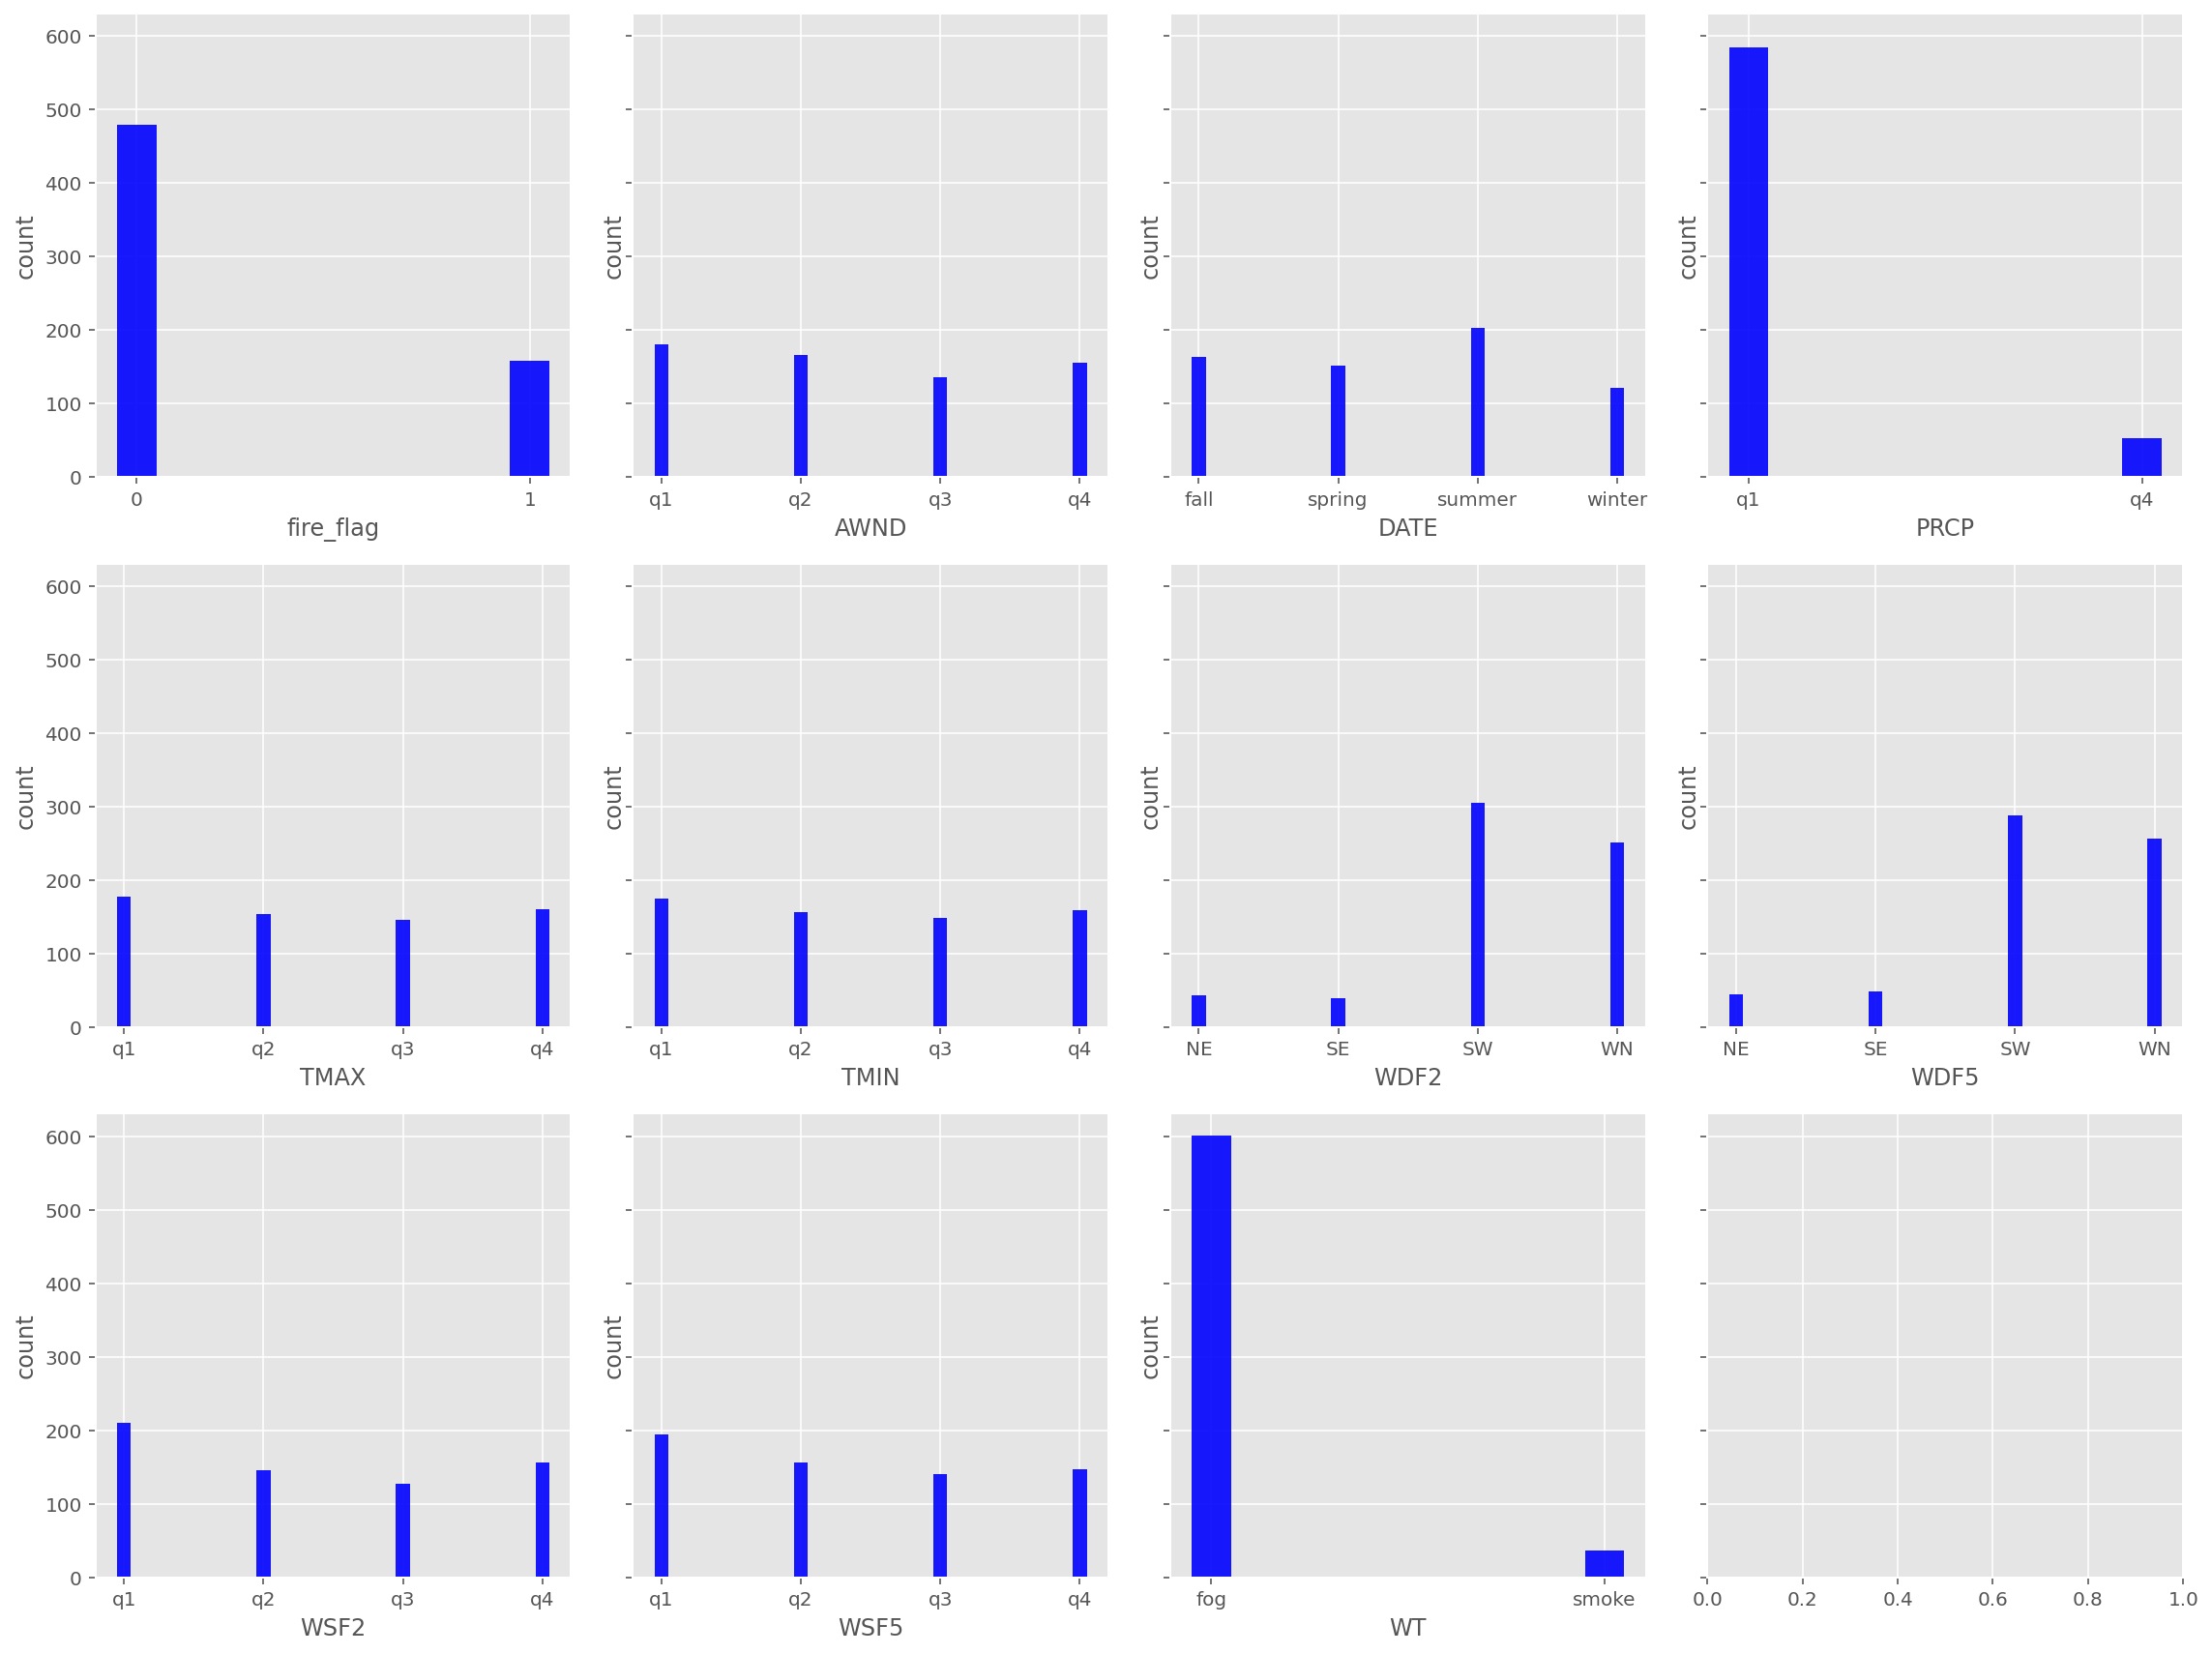

In [51]:
def groupby_column_size(g_series, ax, title):
    bar_names = g_series.index
    bar_values = g_series.values
    X = np.arange(len(bar_values))
    width=0.1

    # to draw a bar chart
    ax.bar(X, bar_values, alpha=0.9, width = width, color='blue')
    
    # to set x and y axis label
    ax.set_xlabel(title)
    ax.set_ylabel('count')
    
    # the ticks of x axis
    ax.set_xticks(X)

    # the label of each group
    ax.set_xticklabels(bar_names)
    
def df_column_groupby_bar(show_df):
    """
    To draw bar charts for all columns.

    Input parameters:
      none.

    Returns:
      null.

    Raises:
      none
    """
    
    column_names = show_df.columns
    
    # Create 24 subplots and unpack the output array immediately
    fig, axsubs = plt.subplots(3, 4, sharey=True, figsize=(16, 12))

    # To draw bar chart and best fit line
    groupby_column_size(show_df.groupby(column_names[0]).size(), axsubs[0, 0], column_names[0])
    groupby_column_size(show_df.groupby(column_names[1]).size(), axsubs[0, 1], column_names[1])
    groupby_column_size(show_df.groupby(column_names[2]).size(), axsubs[0, 2], column_names[2])
    groupby_column_size(show_df.groupby(column_names[3]).size(), axsubs[0, 3], column_names[3])

    
    groupby_column_size(show_df.groupby(column_names[4]).size(), axsubs[1, 0], column_names[4])
    groupby_column_size(show_df.groupby(column_names[5]).size(), axsubs[1, 1], column_names[5])
    groupby_column_size(show_df.groupby(column_names[6]).size(), axsubs[1, 2], column_names[6])
    groupby_column_size(show_df.groupby(column_names[7]).size(), axsubs[1, 3], column_names[7])

    
    groupby_column_size(show_df.groupby(column_names[8]).size(), axsubs[2, 0], column_names[8])
    groupby_column_size(show_df.groupby(column_names[9]).size(), axsubs[2, 1], column_names[9])
    groupby_column_size(show_df.groupby(column_names[10]).size(), axsubs[2, 2], column_names[10])


    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

# To show picture
df_column_groupby_bar(sub_4q_df)

# 4.2) Do logistic regression fit with categorical variables

In [52]:
# To get dummy variables.
sub_dummy_df = pd.get_dummies(sub_4q_df)

# To choose dataset of X
fire_X = sub_dummy_df.iloc[:,1:]

# to choose dataset of Y
fire_Y = sub_dummy_df.iloc[:,0]

# do logistic regression fit
# Build the training and test
x_train,x_test,y_train,y_test = train_test_split(fire_X, fire_Y,test_size=0.2, random_state=17)

# building the model and fitting the data
log_reg = sm.Logit(y_train, x_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.356933
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              fire_flag   No. Observations:                  510
Model:                          Logit   Df Residuals:                      483
Method:                           MLE   Df Model:                           26
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.3640
Time:                        10:10:53   Log-Likelihood:                -182.04
converged:                       True   LL-Null:                       -286.24
Covariance Type:            nonrobust   LLR p-value:                 2.145e-30
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
AWND_q1         0.3796        nan        nan        nan         nan         nan
AWND_q2         0.3747   

In [53]:
from sklearn.linear_model import LogisticRegression
climate_lr = LogisticRegression()
result = climate_lr.fit(x_train,y_train)
print("The socre of train set is {}".format(climate_lr.score(x_train,y_train)))
print("The socre of test set is {}".format(climate_lr.score(x_test,y_test)))

The socre of train set is 0.8372549019607843
The socre of test set is 0.765625


# 4.3) Evaluate the model

- Using different combination of variables to get the model that has the highest Pseudo R-squ.

In [54]:
import itertools

In [55]:
def test_optimize(test_df, cols):
    
    prsquared = -999999999999
    train_score = 0
    test_score = 0
    
    try:
        
        # sub_4q_df2 = sub_4q_df[['fire_flag','TMAX','WDF5']]
        sub_4q_df2 = test_df[cols]

        sub_dummy_df = pd.get_dummies(sub_4q_df2)

        # To choose dataset of X
        fire_X = sub_dummy_df.iloc[:,1:]

        # to choose dataset of Y
        fire_Y = sub_dummy_df.iloc[:,0]

        # Build the training and test
        x_train,x_test,y_train,y_test = train_test_split(fire_X, fire_Y,test_size=0.2, random_state=17)

        # building the model and fitting the data
        log_reg = sm.Logit(y_train, x_train).fit()

        # print(log_reg.summary())
        # print("The prsquared is %0.8f" %log_reg.prsquared)

        climate_lr = LogisticRegression()
        result = climate_lr.fit(x_train,y_train)
        # print("The socre of train set is {}".format(climate_lr.score(x_train,y_train)))
        # print("The socre of test set is {}".format(climate_lr.score(x_test,y_test)))
        
        prsquared = log_reg.prsquared
        train_score = climate_lr.score(x_train,y_train)
        test_score = climate_lr.score(x_test,y_test)
    
    except:
        print("exception: ")
        print(cols)
        
    return prsquared, train_score, test_score
    


In [56]:
def find_best(test_df, cols, size):
    r2_max = 0
    train_max = 0
    test_max = 0
    comb = ''
    
    # get combination of column names. For example, ['TMAX', 'WDF5']
    lst = list(itertools.combinations(cols, size))
    #print(lst)
    for l in lst:
        names = ['fire_flag']
        names.extend(list(l))
        #print(names)
        r2, train_score, test_score = test_optimize(test_df, names)
        
        #if r2 > r2_max:
        #    r2_max = r2
        #    comb = a
        
        if r2 > r2_max:
            r2_max = r2
            comb = names
    print("--------------The highest Pseudo R-squ. parameters are followed------------")
    print(" Pseudo R-squ. : %0.8f" %r2_max)
    print(comb)
    return comb

In [57]:
def two_lr_print(data_df, cols):
    
    
    # To get dummy variables.
    sub_dummy_df2 = pd.get_dummies(data_df[cols])
    sub_dummy_df2.head(3)

    # To choose dataset of X
    fire_X = sub_dummy_df2.iloc[:,1:]
    fire_X.head(2)

    # to choose dataset of Y
    fire_Y = sub_dummy_df2.iloc[:,0]
    fire_Y.head(2)

    # do logistic regression fit
    # Build the training and test
    x_train,x_test,y_train,y_test = train_test_split(fire_X, fire_Y,test_size=0.2, random_state=17)

    # building the model and fitting the data
    log_reg = sm.Logit(y_train, x_train).fit()

    print(log_reg.summary())

    climate_lr = LogisticRegression()
    result = climate_lr.fit(x_train,y_train)
    print("The socre of train set is {}".format(climate_lr.score(x_train,y_train)))
    print("The socre of test set is {}".format(climate_lr.score(x_test,y_test)))

In [58]:
the_best_cols = find_best(sub_4q_df, ['AWND', 'DATE', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], 2)

Optimization terminated successfully.
         Current function value: 0.495027
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.534875
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.469122
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504767
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538814
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547535
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.505944
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.492038
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.490687
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.453450
  

In [59]:
print("The best columns are {}".format(the_best_cols) )
two_lr_print(sub_4q_df, the_best_cols)

The best columns are ['fire_flag', 'TMAX', 'TMIN']
Optimization terminated successfully.
         Current function value: 0.441410
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              fire_flag   No. Observations:                  510
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.2135
Time:                        10:10:54   Log-Likelihood:                -225.12
converged:                       True   LL-Null:                       -286.24
Covariance Type:            nonrobust   LLR p-value:                 5.508e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TMAX_q1       -2.3228        nan        nan        nan   

# Simulate 1: AcresBurned = Intercept + coef * TMAX.

- We use the linear regression model to simulate the climate change that will cause burned acres to increase.

- The formula: AcresBurned = Intercept + coef * TMAX.

- TMAX is the max temperature of one day.

In [60]:
# view the data set
awnd_acres_sub_df.head(2)

,TMAX,AcresBurned
0,116.0,6309.0
1,82.0,4100.0


In [61]:
# to describe the data set
awnd_acres_sub_df.describe()

,TMAX,AcresBurned
count,162.000000,162.000000
mean,90.543210,326.438272
std,13.200366,1238.451437
min,61.000000,0.000000
25%,79.250000,20.000000
50%,92.500000,42.500000
75%,98.000000,153.750000
max,119.000000,13139.000000


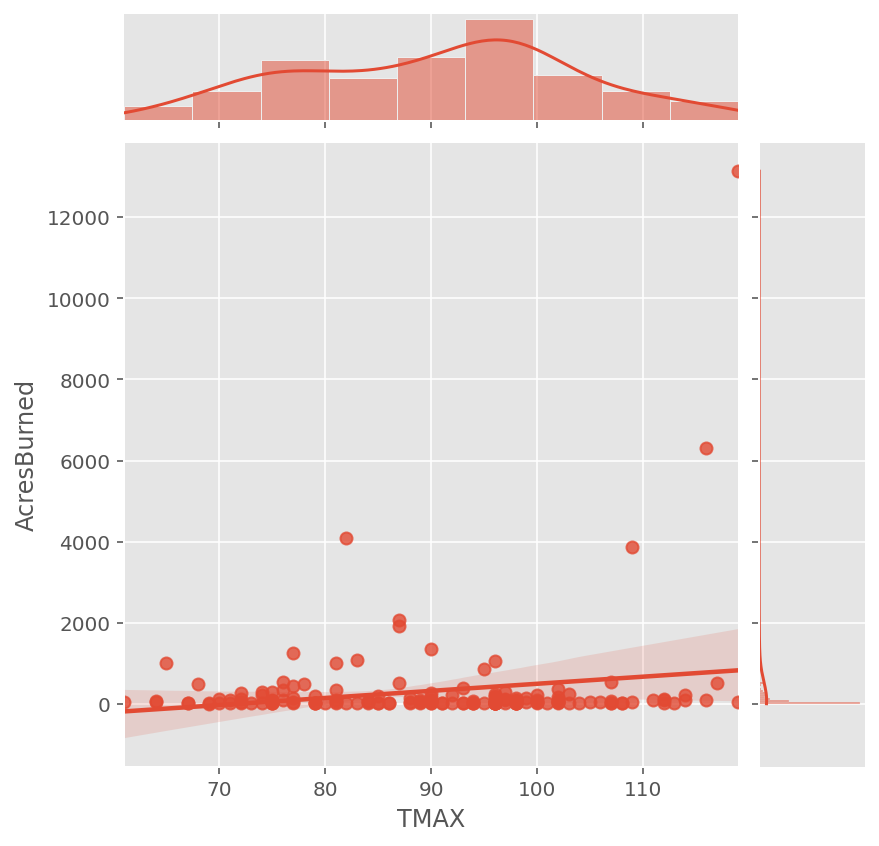

In [62]:
# Using scattor to see the correlation
sns.jointplot(x="TMAX", y="AcresBurned", data=awnd_acres_sub_df, kind="reg");

In [63]:
# Using linear regress to find out Intercept and coef
m = ols('AcresBurned ~ TMAX', awnd_acres_sub_df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AcresBurned   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sat, 08 May 2021   Prob (F-statistic):             0.0176
Time:                        10:10:55   Log-Likelihood:                -1380.2
No. Observations:                 162   AIC:                             2764.
Df Residuals:                     160   BIC:                             2771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1256.0474    666.743     -1.884      0.061   -2572.799      60.704
TMAX          17.4777      7.287      2.398      0.018       3.086      31.869
==============================================================================
Omnibus:                      264.283   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31175.794
Skew:                           7.401   Prob(JB):                         0.00
Kurtosis:                      69.329   Cond. No.                         636.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# To see the modle
print(" AcresBurned = %0.8f + %0.8f * TMAX " %(m.params[0], m.params[1]))

 AcresBurned = -1256.04744476 + 17.47768517 * TMAX 


In [65]:
# using the model to calculate simulation AcresBurned
def cal_one_variable_model(lr_result, x):
    return lr_result.params[0] + lr_result.params[1] * x

awnd_acres_sub_df['real_tmax_total_acres_burned'] = awnd_acres_sub_df.apply(lambda row: cal_one_variable_model(m, row['TMAX']), axis=1)
awnd_acres_sub_df.head(2)

,TMAX,AcresBurned,real_tmax_total_acres_burned
0,116.0,6309.0,771.364035
1,82.0,4100.0,177.122739


Next, to simulate the temperture increase 10 Fahreheit.

In [66]:
def simulate_temperature_increase(increase_fahrenheit, times):
    #result = awnd_acres_sub_df[['TMAX','AcresBurned','real_tmax_total_acres_burned']]
    result = awnd_acres_sub_df[['AcresBurned']]
    for i in range(times):
        j = (i + 1)
        key_temp = "t_add_{}".format(j)
        key = "temp_add_{}_F".format(j)
        f = j * increase_fahrenheit
        #result[key_temp] = awnd_acres_sub_df.apply(lambda row: row['TMAX'] + f, axis=1)
        result[key] = awnd_acres_sub_df.apply(lambda row: cal_one_variable_model(m, row['TMAX'] + f), axis=1)
    
    return result

sim_temp_df = simulate_temperature_increase(1, 10)
sim_temp_df.head(2)

,AcresBurned,temp_add_1_F,temp_add_2_F,temp_add_3_F,temp_add_4_F,temp_add_5_F,temp_add_6_F,temp_add_7_F,temp_add_8_F,temp_add_9_F,temp_add_10_F
0,6309.0,788.841720,806.319405,823.797090,841.274775,858.752461,876.230146,893.707831,911.185516,928.663201,946.140886
1,4100.0,194.600424,212.078109,229.555795,247.033480,264.511165,281.988850,299.466535,316.944220,334.421906,351.899591


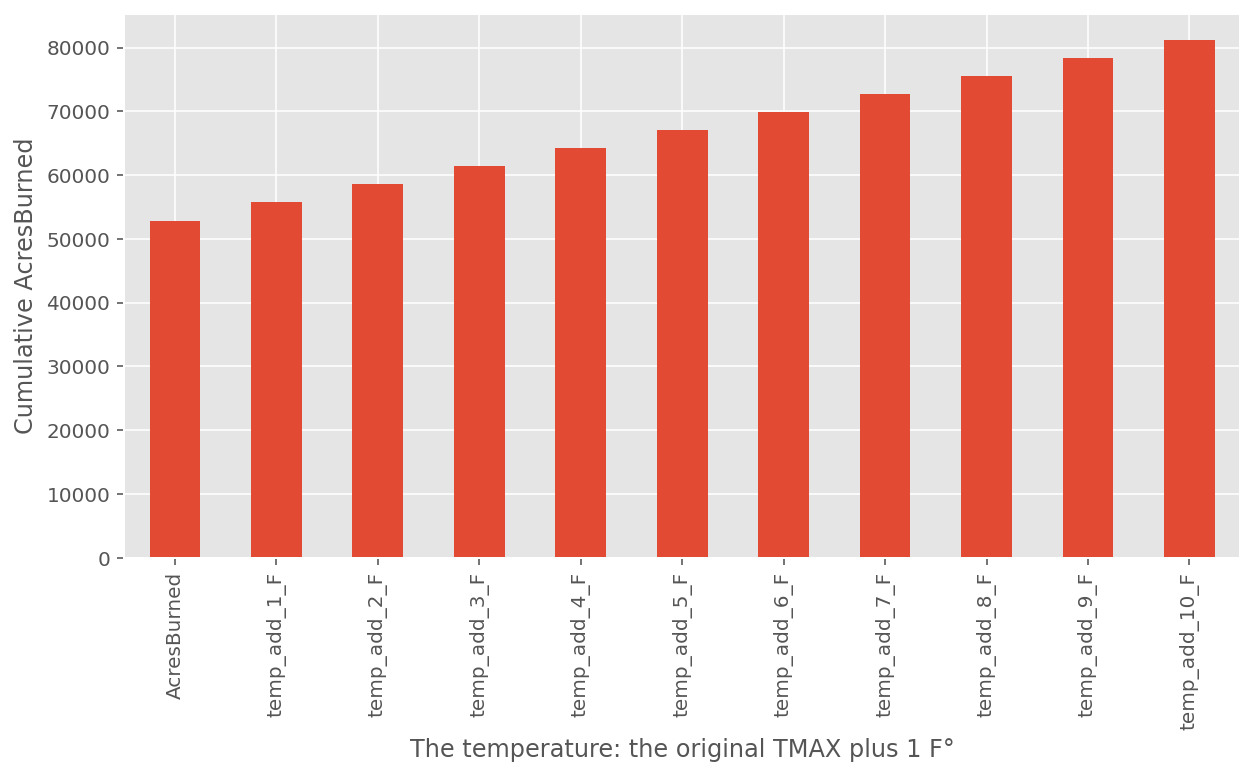

In [67]:
# Draw a bar chart to see the increase trend.
sim_temp_df.sum().plot.bar()
plt.xlabel('The temperature: the original TMAX plus 1 F°')
plt.ylabel('Cumulative AcresBurned')
plt.show();

In [68]:
sum_df = sim_temp_df.sum()
origin_sum_acresburned = sum_df['AcresBurned']

diff_df = sum_df.diff()
diff_df

print("The percentage of increased AcresBurned is %.2f"%((diff_df[1] / origin_sum_acresburned) * 100))

The percentage of increased AcresBurned is 5.35


# Simulate 1 conclusion

- y is AcresBurned. x is the Max Temperature of one day


- Formula： y = -1256.04744476 + 17.47768517 * x 


- Simulate to increase the Max Temperature.


- If the Max Temperature went up 1 Fahrenheit, the AcresBurned will be increased by 2831.38 Acres. The percentage of increased AcresBurned is 5.35%.

# Simulate 2: AcresBurned = Intercept + coef1 * TMAX + coef2 * TMIN.

- We use the linear regression model to simulate the climate change that will cause burned acres to increase.

- The formula: AcresBurned = Intercept + coef1 * TMAX + coef2 * TMIN

- TMAX is the max temperature of one day.

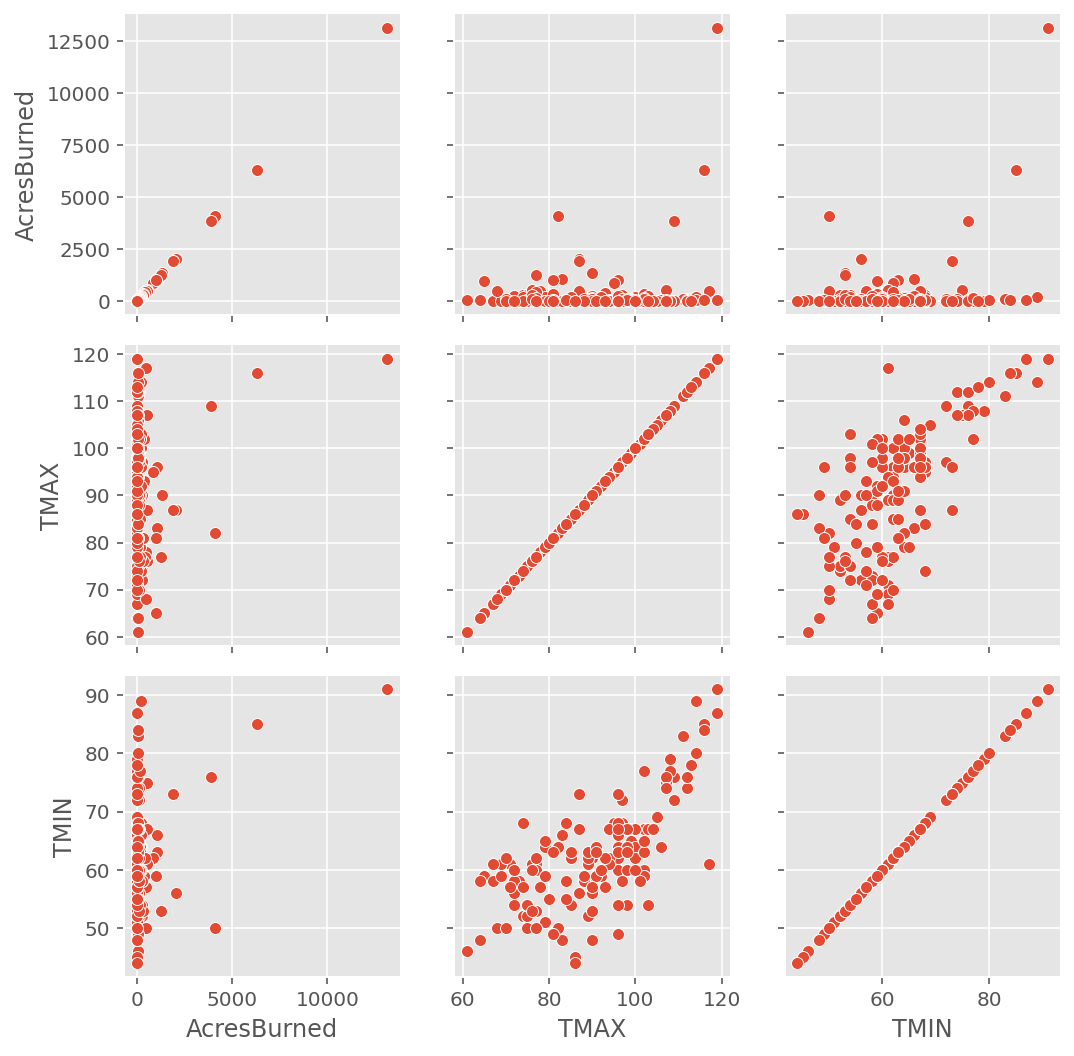

In [69]:
# load the wildfire climate data
fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_climate_and_fire_full.csv')

tmm_acres_sub_df = fire_climate_df[['AcresBurned', 'TMAX', 'TMIN']]

g = sns.PairGrid(tmm_acres_sub_df)
g.map(sns.scatterplot)

In [70]:
tmm_lr = ols('AcresBurned ~ TMAX + TMIN', tmm_acres_sub_df).fit()
tmm_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AcresBurned   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7.564
Date:                Sat, 08 May 2021   Prob (F-statistic):           0.000733
Time:                        10:10:57   Log-Likelihood:                -1351.4
No. Observations:                 159   AIC:                             2709.
Df Residuals:                     156   BIC:                             2718.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2224.8837    729.764     -3.049      0.003   -3666.377    -783.391
TMAX          -2.7297      9.925     -0.275      0.784     -22.334      16.875
TMIN          44.9727     14.973      3.004      0.003      15.397      74.549
==============================================================================
Omnibus:                      245.427   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23080.692
Skew:                           6.707   Prob(JB):                         0.00
Kurtosis:                      60.480   Cond. No.                         851.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# using the model to calculate simulation AcresBurned
def cal_one_variable_model(tmm_lr, x1, x2):
    return tmm_lr.params[0] + tmm_lr.params[1] * x1 + tmm_lr.params[2] * x2


def simulate_temperature_increase(increase_fahrenheit, times, increase_type):
    
    result = tmm_acres_sub_df[['AcresBurned']]
    for i in range(times):
        j = (i + 1)
        key_temp = "t_add_{}".format(j)
        key = "temp_add_{}_F".format(j)
        f = j * increase_fahrenheit
        
        if increase_type == 1: # TMAX + 1, TMIN + 1
            result[key] = tmm_acres_sub_df.apply(lambda row: cal_one_variable_model(tmm_lr, row['TMAX'] + f, row['TMIN'] + f), axis=1)
        elif increase_type == 2:# TMAX + 1, TMIN
            result[key] = tmm_acres_sub_df.apply(lambda row: cal_one_variable_model(tmm_lr, row['TMAX'] + f, row['TMIN']), axis=1)
        else: # # TMAX, TMIN + 1
            result[key] = tmm_acres_sub_df.apply(lambda row: cal_one_variable_model(tmm_lr, row['TMAX'], row['TMIN'] + f), axis=1)
    
    return result

In [72]:
sim_max1_min1_df = simulate_temperature_increase(1, 10, 1)
sim_max1_min_df = simulate_temperature_increase(1, 10, 2)
sim_max_min1_df = simulate_temperature_increase(1, 10, 3)

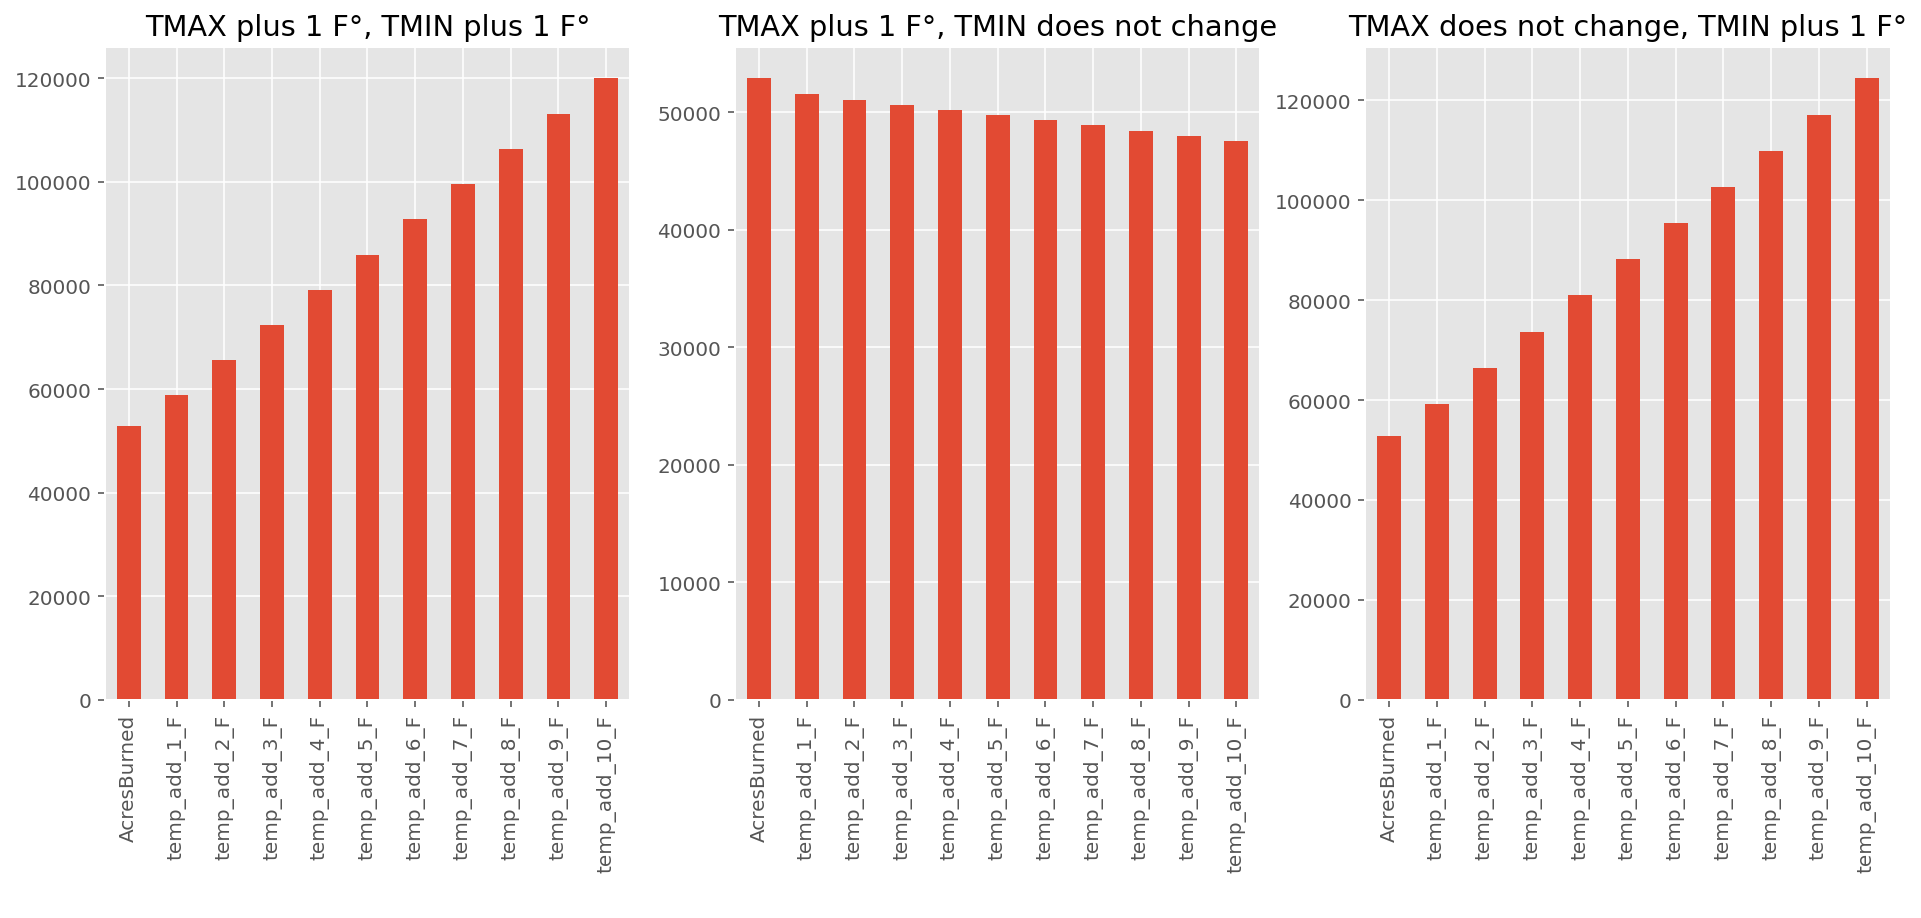

In [73]:
plt.figure(figsize=(16,6))
# Using matplotlib
# define a Matplotlib figure
plt.figure(1)

# subplot ('122' = 1x2, position 1)
plt.subplot(131)

# define the type of plot you want to appear
sim_max1_min1_df.sum().plot.bar()

# give the plot a title
plt.title('TMAX plus 1 F°, TMIN plus 1 F°')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

# subplot ('122' = 1x2, position 2)
plt.subplot(132)

# define the type of plot you want to appear
sim_max1_min_df.sum().plot.bar()

# give the plot a title
plt.title('TMAX plus 1 F°, TMIN does not change')
plt.xlabel(' ')

# subplot ('122' = 1x2, position 2)
plt.subplot(133)

# define the type of plot you want to appear
sim_max_min1_df.sum().plot.bar()

# give the plot a title
plt.title('TMAX does not change, TMIN plus 1 F°')
plt.xlabel(' ')

plt.show()

In [74]:
sum_df = sim_max_min1_df.sum()
origin_sum_acresburned = sum_df['AcresBurned']

diff_df = sum_df.diff()
diff_df

print("The increased AcresBurned is %.2f"%(diff_df[1]))
print("The percentage of increased AcresBurned is %.2f"%((diff_df[1] / origin_sum_acresburned) * 100))

The increased AcresBurned is 6323.49
The percentage of increased AcresBurned is 11.96


# Simulate 2 conclusion

- y is AcresBurned. x1 is the Max Temperature of one day. x2 is the Min Temperature of one day


- Formula： y = -2224.8837 - 2.7297 * x1 + 44.9727 * x2


- Simulate to increase the Max and Min Temperature.


- If the Min Temperature went up 1 F°, the burned acrse will increase 6323.49 acres and the percentage of increased AcresBurned is 11.96.

# Simulation 3

Using logistic regression to predict TMIN + 10F°

In [75]:
f10_sub_tmm_4q_df = original_4q_df[['fire_flag', 'TMAX', 'TMIN']]
f10_tmm_tmax_q4_dict = get_4qs(f10_sub_tmm_4q_df, 'TMAX')
f10_tmm_tmin_q4_dict = get_4qs(f10_sub_tmm_4q_df, 'TMIN')
# original db TMIN add 10 F°
f10_sub_tmm_4q_df['TMIN'] = f10_sub_tmm_4q_df.apply(lambda row: row['TMIN'] + 10, axis=1)

f10_sub_tmm_4q_df['TMIN'] = f10_sub_tmm_4q_df.apply(lambda row: get_level(f10_tmm_tmin_q4_dict, row['TMIN']), axis=1)

f10_sub_tmm_4q_df['TMAX'] = f10_sub_tmm_4q_df.apply(lambda row: get_level(f10_tmm_tmax_q4_dict, row['TMAX']), axis=1)
f10_sub_tmm_4q_df.head(5)

,fire_flag,TMAX,TMIN
0,1,q4,q4
1,1,q3,q3
2,1,q4,q4
3,1,q3,q4
4,1,q3,q3


In [76]:
sub_tmm_4q_df = original_4q_df[['fire_flag', 'TMAX', 'TMIN']]
split_by_q1_to_q4(sub_tmm_4q_df, ['TMAX', 'TMIN'])
sub_tmm_4q_df.head(5)

,fire_flag,TMAX,TMIN
0,1,q4,q4
1,1,q3,q1
2,1,q4,q4
3,1,q3,q2
4,1,q3,q2


In [77]:
def get_lg_model(input_df):
    # To get dummy variables.
    sub_dummy_df = pd.get_dummies(input_df)

    # To choose dataset of X
    fire_X = sub_dummy_df.iloc[:,1:]

    # to choose dataset of Y
    fire_Y = sub_dummy_df.iloc[:,0]

    # do logistic regression fit
    # Build the training and test
    x_train,x_test,y_train,y_test = train_test_split(fire_X, fire_Y,test_size=0.2, random_state=17)

    # building the model and fitting the data
    #log_reg = sm.Logit(y_train, x_train).fit()

    #print(log_reg.summary())

    climate_lr = LogisticRegression()
    result = climate_lr.fit(x_train,y_train)
    print("The socre of train set is {}".format(climate_lr.score(x_train,y_train)))
    print("The socre of test set is {}".format(climate_lr.score(x_test,y_test)))

    return climate_lr

def sk_lg(no_add_f_lg_model, input_df):
    # To get dummy variables.
    sub_dummy_df = pd.get_dummies(input_df)

    # To choose dataset of X
    fire_X = sub_dummy_df.iloc[:,1:]

    # to choose dataset of Y
    fire_Y = sub_dummy_df.iloc[:,0]

    # do logistic regression fit
    # Build the training and test
    x_train,x_test,y_train,y_test = train_test_split(fire_X, fire_Y,test_size=0.2, random_state=17)

    # building the model and fitting the data
    #log_reg = sm.Logit(y_train, x_train).fit()

    #print(log_reg.summary())

    climate_lr = no_add_f_lg_model
    result = climate_lr.fit(x_train,y_train)
    #print("The socre of train set is {}".format(climate_lr.score(x_train,y_train)))
    #print("The socre of test set is {}".format(climate_lr.score(x_test,y_test)))
    
    y_all_predict = climate_lr.predict(fire_X)
    
    
    (unique, counts) = np.unique(y_all_predict, return_counts=True)
    y_predict_frequencies = np.asarray((unique, counts)).T

    #print(y_predict_frequencies)

    return y_all_predict

In [93]:
# get lg model by un-add 10F°
no_add_f_lg_model = get_lg_model(sub_tmm_4q_df)

print("model: intercept = %.2f" %no_add_f_lg_model.intercept_)
print("model: coef = %.2f" %no_add_f_lg_model.coef_[0][0])

The socre of train set is 0.7901960784313725
The socre of test set is 0.75
model: intercept = -1.35
model: coef = -1.44


#### The logistic regression formular is followed:


## $ p = \quad {1 \over 1 + e^{-(-1.35 + -1.44 * TMIN)} } $

In [80]:
# Using un-add 10F° logistic regression model to perdict original dataset
original_y_predict = sk_lg(no_add_f_lg_model, sub_tmm_4q_df)

The socre of train set is 0.7901960784313725
The socre of test set is 0.75
[[  0 573]
 [  1  65]]


In [81]:
# Using un-add 10F° logistic regression model to perdict TMIN + 10F° dataset
f10_y_predict = sk_lg(no_add_f_lg_model, f10_sub_tmm_4q_df)

The socre of train set is 0.7686274509803922
The socre of test set is 0.7734375
[[  0 479]
 [  1 159]]


To compare 3 different situations

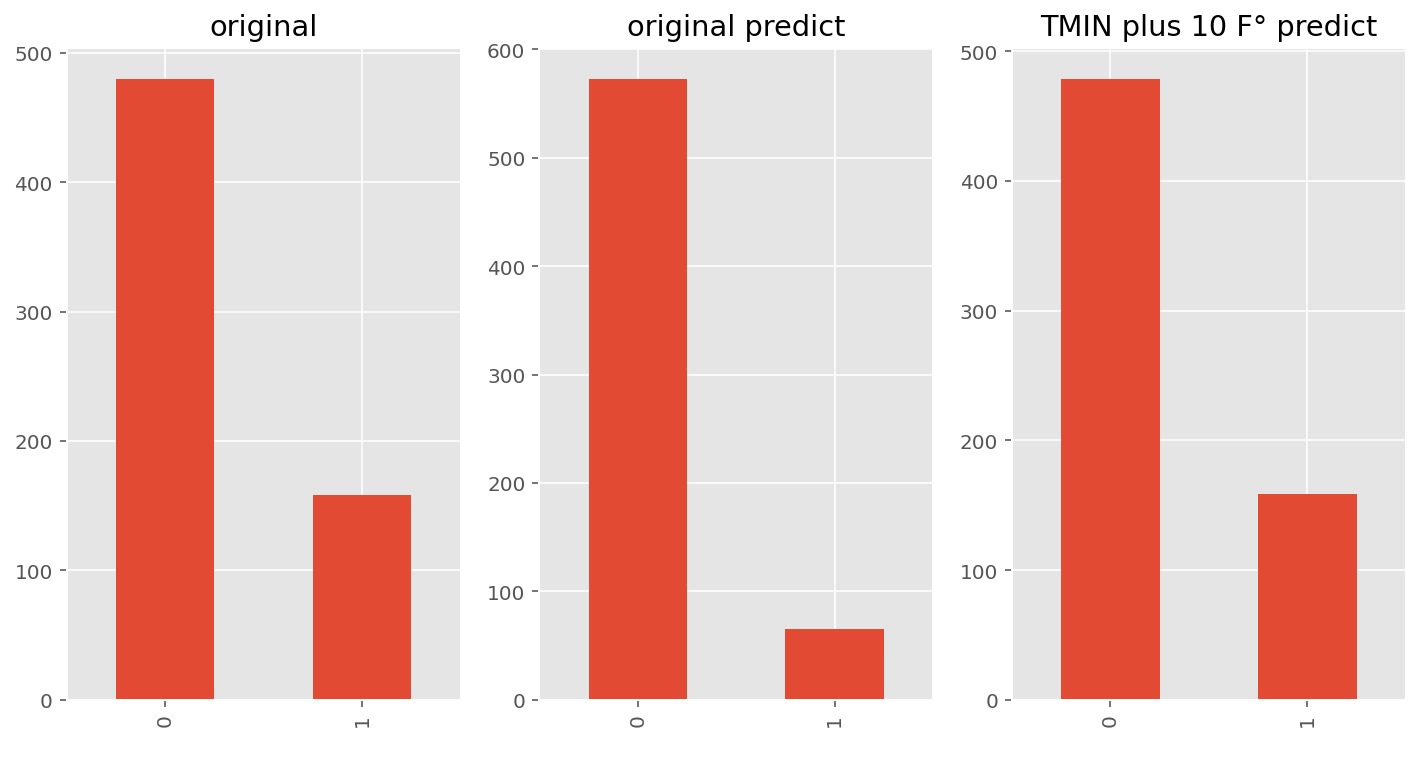

In [90]:
plt.figure(figsize=(12,6))
# Using matplotlib
# define a Matplotlib figure
plt.figure(1)

# subplot ('122' = 1x2, position 1)
plt.subplot(131)

# define the type of plot you want to appear
fire_flag_bar_df = sub_tmm_4q_df[['fire_flag']].groupby('fire_flag').size()

fire_flag_bar_df.plot.bar()

# give the plot a title
plt.title('original')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

# subplot ('122' = 1x2, position 2)
plt.subplot(132)

# define the type of plot you want to appear
original_predict_df = pd.DataFrame(original_y_predict, columns = ['fire_flag'])
no_o_df = original_predict_df.groupby('fire_flag').size()
no_o_df.plot.bar()

# give the plot a title
plt.title('original predict')
plt.xlabel(' ')

# subplot ('122' = 1x2, position 2)
plt.subplot(133)

# define the type of plot you want to appear
f10_predict_df = pd.DataFrame(f10_y_predict, columns = ['fire_flag'])
f10_o_df = f10_predict_df.groupby('fire_flag').size()
f10_o_df.plot.bar()

# give the plot a title
plt.title('TMIN plus 10 F° predict')
plt.xlabel(' ')

plt.show()

# Simulation 3 Conclusion

## The formular is $ p = \quad {1 \over 1 + e^{-(-1.35 + -1.44x)} } $

We simulate that TMIN plus 10 F°. If the Min Temperature went up 10 F°, the predicted fires would increase from 65 times to 159 times. (There were 158 fires in the actual dataset ).

# Reference

[1] www.kaggle.com. California WildFires(2013-2020) Data Set. [online] Available at: https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020 [Accessed 2021-03-05].


[2] www.indexmundi.com. California Median household income (in 2018 dollars), 2014-2018 by County Data Set. [online] Available at: https://www.indexmundi.com/facts/united-states/quick-facts/california/median-household-income#table [Accessed 2021-03-05].
www.ncdc.noaa.gov/cdo-web/. California Climate Data set. Available at: https://www.ncdc.noaa.gov/cdo-web/  [Accessed 2021-03-05].


[3] www.usgs.gov. Will Global warming produce more frequent and more intense wildfires? [online] Available at: https://www.usgs.gov/faqs/will-global-warming-produce-more-frequent-and-more-intense-wildfires?qt-news_science_products=0#qt-news_science_products [Accessed 2021-03-28].


[4] www.ucsusa.org. Infographic: Wildfires and climate change. [online] Available at: https://www.ucsusa.org/resources/infographic-wildfires-and-climate-change [Accessed 2021-04-15].


